# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import norm
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
%matplotlib inline

In [3]:
pokemon = pd.read_csv('Pokemon.csv')

From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

My hypothesis is that the Total field is computed following a linear regression model:  
$$Total = b_{0} + HP * b_{1} + Attack * b_{2} + Defense * b_{3} + Sp. Atk * b_{4} + Sp. Def * b_{5} + Speed * b_{6}$$

In [6]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# Drop duplicated index
pokemon.drop(columns='#',inplace=True)

In [8]:
# Filter numeric data
poke1 = pokemon._get_numeric_data()
poke1.drop(columns=['Generation','Legendary'], inplace=True)
poke1

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


In [9]:
# Reorder columns
poke1.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [10]:
poke1 = poke1[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']]

In [11]:
# Obtain the factors of the linear regression

In [12]:
## Split the dependent variable Total
X = poke1.drop(columns = 'Total')
y = poke1.Total

In [13]:
## Create the linear model
lm = linear_model.LinearRegression()
lm = lm.fit(X,y)

In [15]:
## Obtain the coeficientes - slopes
print(len(lm.coef_))
lm.coef_

6


array([1., 1., 1., 1., 1., 1.])

In [16]:
## Get the intercept
lm.intercept_

-3.410605131648481e-13

The formula for the Total field is the following:  
**$$Total = HP + Attack + Defense + Sp. Atk + Sp. Def + Speed$$**

In [35]:
# ??? How could I sum all the columns by row
sum(list(poke1.Total == poke1.iloc[:,:-1].sum(axis=1)))

800

**Yes, it is true for every pokemon**

In [28]:
# Get the correlation matrix
poke1.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.618748
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.736211
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.612787
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.747250
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.717609
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.575943
Total,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

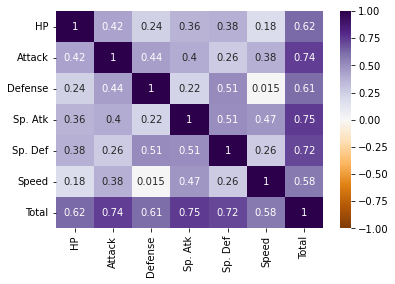

In [31]:
# Plot heat map
sns.heatmap(round(poke1.corr(),3),vmin=-1,vmax=1,cmap= 'PuOr',annot=True)
plt.show

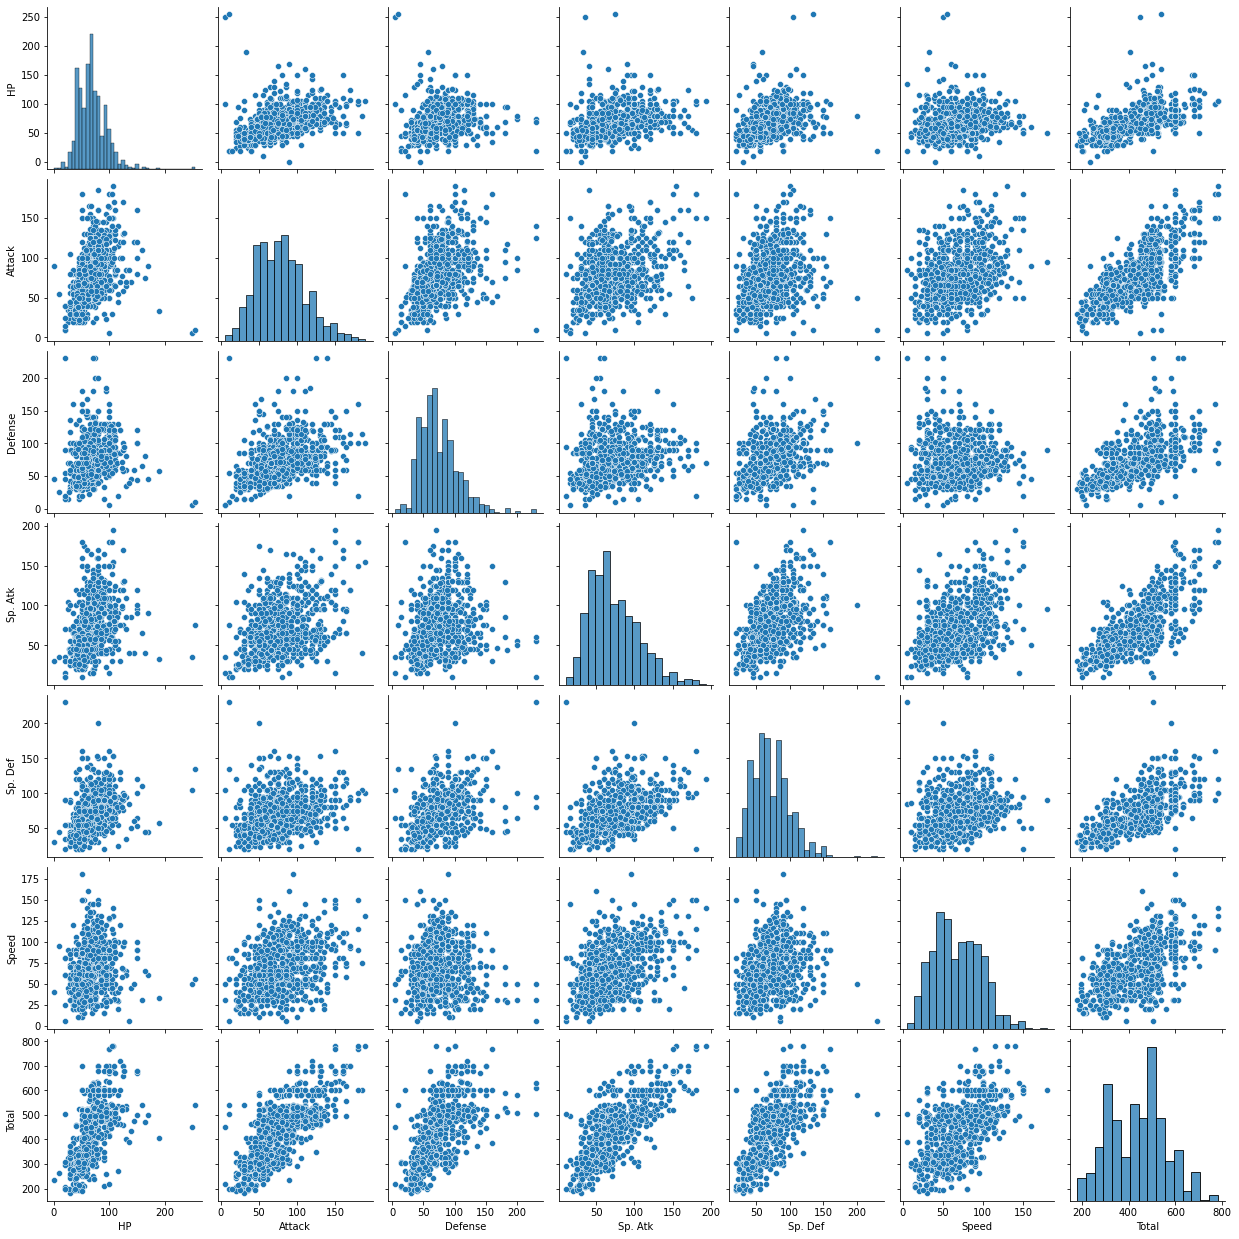

In [33]:
# Plot pairplot
sns.pairplot(poke1)
plt.show()

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [ ]:
# General info

In [39]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
# Categorical Data Frame

In [40]:
pokecat = pokemon.select_dtypes('object')

In [41]:
pokecat.columns

Index(['Name', 'Type 1', 'Type 2'], dtype='object')

In [42]:
pokecat = pokecat.iloc[:,1:]
pokecat.columns

Index(['Type 1', 'Type 2'], dtype='object')

In [ ]:
# Inspect categorical variables

In [63]:
print(pokecat['Type 1'].nunique())
pokecat['Type 1'].unique()

18


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [50]:
print(pokecat['Type 2'].nunique())
pokecat['Type 2'].value_counts()

18


Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [ ]:
# Encoding

In [66]:
# List of categories
categories = list(pokecat['Type 1'].unique())
categories

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [115]:
#encoder = OneHotEncoder(categories=categories,sparse=False,dtype=int) #,handle_unknown='ignore')
encoder = OneHotEncoder(sparse=False,dtype=int) 

encoder.fit(pokecat)
#encoder1 = encoder.fit(pokecat[['Type 1']])
#encoder2 = encoder.fit(pokecat[['Type 2']])
encoder.categories_


[array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
        'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
        'Psychic', 'Rock', 'Steel', 'Water'], dtype=object),
 array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
        'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
        'Psychic', 'Rock', 'Steel', 'Water', nan], dtype=object)]

In [116]:
print(encoder.drop_idx_)

None


In [117]:
pokecatE = encoder.transform(pokecat)
pokecatE

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [118]:
pokecatE.shape

(800, 37)

In [119]:
len(encoder.categories_)

2

In [120]:
categories = list(encoder.categories_[0]) + list(encoder.categories_[1])
print(len(categories))
categories

37


['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 nan]

In [121]:
# The last item will be cause of errors
categories[-1] = 'NaN'
categories

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 'NaN']

In [122]:
pokecatE = pd.DataFrame(pokecatE, columns = categories)
pokecatE

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,NaN
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
pokecatE.columns

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', 'Bug', 'Dark', 'Dragon',
       'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass',
       'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel',
       'Water', 'NaN'],
      dtype='object')

In [124]:
pokecatE.columns[-1]

'NaN'

In [125]:
# testing column indexes
pokecatE['NaN']

0      0
1      0
2      0
3      0
4      1
      ..
795    0
796    0
797    0
798    0
799    0
Name: NaN, Length: 800, dtype: int64

In [126]:
# Drop NaN category
pokecatE = pokecatE.iloc[:,:-1]
print(len(pokecatE.columns))
pokecatE.columns

36


Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', 'Bug', 'Dark', 'Dragon',
       'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass',
       'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel',
       'Water'],
      dtype='object')

In [128]:
# Split the dataframe in two

pokecatE1 = pokecatE.iloc[:,:18]
pokecatE2 = pokecatE.iloc[:,18:]
display(pokecatE1.head())
display(pokecatE2.head())


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
pokecatE0 = pokecatE1 + pokecatE2
pokecatE0

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
796,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
797,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [134]:
# Checking it went all right
for f in pokecatE0:
    for x in pokecatE0[f]:
        if not x in [0,1]:
            print('fallo en %s' %(f))


## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [136]:
pokecatY = pd.concat([pokecatE0,y], axis = 1)
pokecatY

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Total
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,318
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,405
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,525
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,625
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,600
796,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,700
797,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,600
798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,680


In [137]:
pokecatY.corr()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Total
Bug,1.000000,-0.082062,-0.081200,-0.045111,-0.072148,-0.048645,-0.060536,0.064571,-0.058915,-0.034430,-0.063544,-0.070229,-0.120219,0.121210,-0.111968,-0.003706,0.047178,-0.123983,-0.145781
Dark,-0.082062,1.000000,-0.003963,-0.067375,-0.059864,-0.007791,-0.020368,-0.022164,0.001484,-0.048339,-0.023480,-0.010163,-0.099751,-0.018227,-0.044327,-0.033493,-0.023978,-0.028548,0.056154
Dragon,-0.081200,-0.003963,1.000000,-0.024000,-0.035541,-0.068775,-0.038069,0.026237,-0.019410,-0.078818,0.052430,0.015173,-0.098702,-0.055525,-0.026557,-0.032360,-0.044417,-0.083285,0.229705
Electric,-0.045111,-0.067375,-0.024000,1.000000,-0.035541,-0.068775,-0.057104,-0.020407,-0.041592,-0.078818,-0.059420,-0.033382,-0.067737,-0.074838,-0.091928,-0.072188,-0.001346,-0.069109,0.020971
Fairy,-0.072148,-0.059864,-0.035541,-0.035541,1.000000,-0.061108,-0.067651,-0.052669,-0.056665,-0.048756,-0.069360,-0.051232,-0.001720,-0.066495,0.027227,0.002212,0.013155,-0.067703,-0.036698
Fighting,-0.048645,-0.007791,-0.068775,-0.068775,-0.061108,1.000000,0.051130,-0.086119,-0.065792,-0.051171,-0.080531,-0.059483,-0.071687,-0.039613,0.000596,-0.055090,-0.005161,-0.073778,0.077786
Fire,-0.060536,-0.020368,-0.038069,-0.057104,-0.067651,0.051130,1.000000,-0.028855,-0.013459,-0.108248,-0.022621,-0.065851,-0.085097,-0.085471,-0.061243,-0.064677,-0.056108,-0.114850,0.078726
Flying,0.064571,-0.022164,0.026237,-0.020407,-0.052669,-0.086119,-0.028855,1.000000,-0.061555,-0.081366,-0.060578,-0.049498,0.125506,-0.067950,-0.063872,-0.048221,-0.081400,-0.092030,0.059383
Ghost,-0.058915,0.001484,-0.019410,-0.041592,-0.056665,-0.065792,-0.013459,-0.061555,1.000000,0.075316,-0.035908,-0.029914,-0.094420,0.008736,-0.070947,-0.069057,0.026479,-0.077314,0.003641
Grass,-0.034430,-0.048339,-0.078818,-0.078818,-0.048756,-0.051171,-0.108248,-0.081366,0.075316,1.000000,-0.097033,-0.027476,-0.117156,0.110372,-0.094009,-0.072829,-0.061537,-0.126894,-0.052592


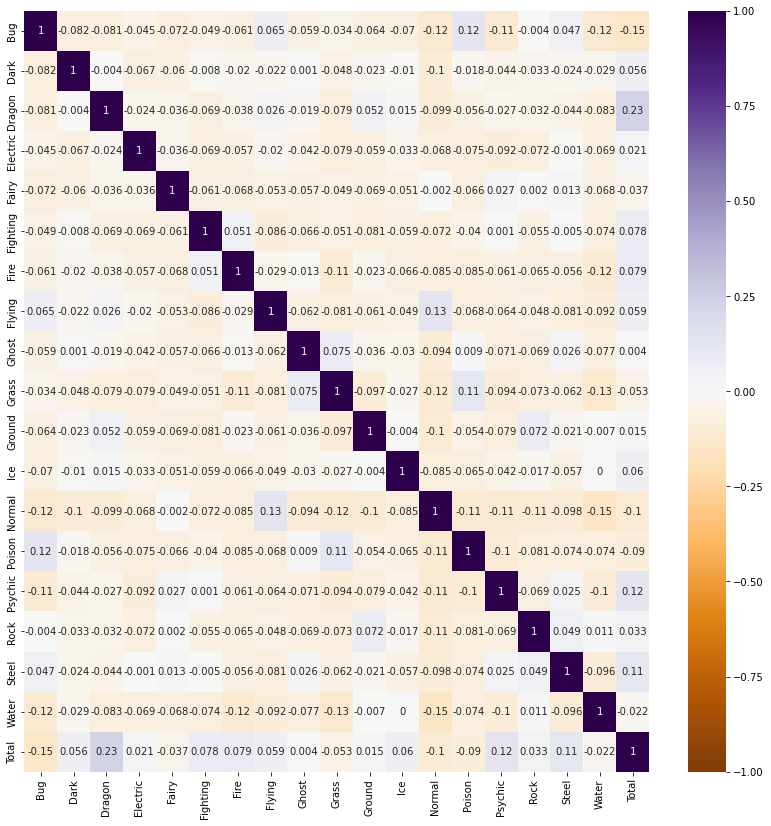

In [139]:
f,a = plt.subplots(figsize=(14,14))
sns.heatmap(round(pokecatY.corr(),3), vmin=-1, vmax=1, cmap= 'PuOr',annot=True)
plt.show()

In [140]:
totalCorrelations = pokecatY.corr()['Total']
totalCorrelations

Bug        -0.145781
Dark        0.056154
Dragon      0.229705
Electric    0.020971
Fairy      -0.036698
Fighting    0.077786
Fire        0.078726
Flying      0.059383
Ghost       0.003641
Grass      -0.052592
Ground      0.015060
Ice         0.060248
Normal     -0.105331
Poison     -0.090441
Psychic     0.124688
Rock        0.032731
Steel       0.109703
Water      -0.021665
Total       1.000000
Name: Total, dtype: float64

In [148]:
totalCorrelations.sort_values(ascending=False)[1:2].index[0]

'Dragon'

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [150]:
totalCorrelations.sort_values(ascending=False)[1:3]

Dragon     0.229705
Psychic    0.124688
Name: Total, dtype: float64

In [ ]:
# Test the linear regression slopes. Do they the follow the same rank?